In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
import pickle
from xgboost import plot_tree
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# #############################################################################
# Real benchmarked dataset
data = pd.read_csv('../../RealData/RealData_nginx_small.csv')
#data = pd.read_csv('../../RealData/RealData_squid_big.csv')

## Log Syn. Data
#data = pd.read_csv('../../SynData/data/GeneratedLogData.csv')




In [3]:
# #############################################################################
# Training and Testing Data
X = data[['throughput']]
y = data['CPU']


X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

n = len(X)
kf = KFold(n_splits=5, shuffle=True)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [4]:
# #############################################################################
# Fit XGB regression model
clf = xgb.XGBRegressor()
#clf = GridSearchCV(xgb_model, {'max_depth': [3, 4, 6, 8, 9, 10], 'n_estimators': [100, 110, 200]}, verbose=1, n_jobs=-1)
clf.fit(X_train, y_train)

#{'eta': 0.01, 'max_depth': 3, 'n_estimators': 50, 'scale_pos_weight': 1}

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [5]:
prediction = clf.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Throuput,Actual,Predicted
0,0.010205,0.1,0.103942
1,0.004575,0.1,0.103942
2,0.013685,0.1,0.103942
3,0.010144,0.1,0.103942
4,0.014241,0.1,0.103942
5,0.011345,0.1,0.103942
6,0.010950,0.1,0.103942
7,0.012395,0.1,0.103942
8,0.010272,0.1,0.103942
9,0.010917,0.1,0.103942


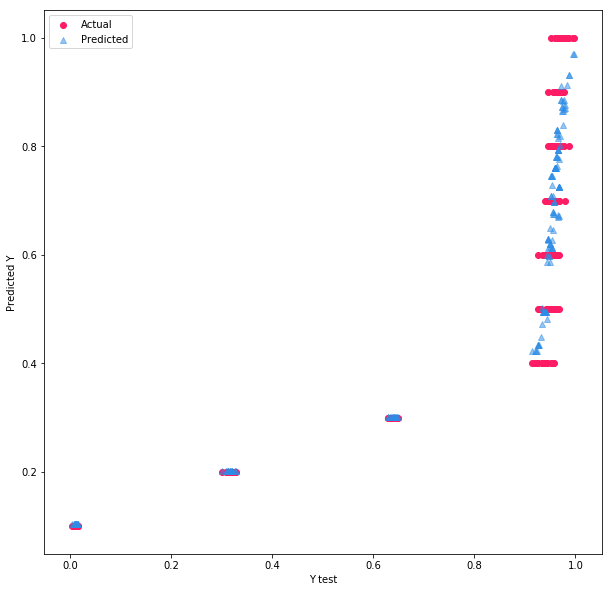

In [6]:
#Plot prediction
fig = plt.figure(figsize=(10, 10))

plt.scatter(X_test, y_test,  color='#fe1c64',label="Actual")
plt.scatter(X_test, prediction, color='#2e8de6', linewidth=1,marker='^',alpha = 0.5,label="Predicted")
plt.xlabel("Y test")
plt.ylabel("Predicted Y")
plt.legend()

In [7]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R^2:',metrics.r2_score(y_test, prediction))




MAE: 0.08105252735316752
MSE: 0.01409659359922528
RMSE: 0.11872907646918374
R^2: 0.8329292610462189


In [8]:
# save the model to disk
filename = '../models/XGB_nginx_big_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [9]:
data = scaler.transform(np.float32([[30]])) 
print(data)

[[-0.25768727]]


In [10]:
clf.predict(data)

array([0.10394204], dtype=float32)